In [1]:
# TF Classification - EDA and preProcessing
# 3 different models - Model 3 is the best performing
# Model 3 - Best One - Classification Neural Network with Early Stopping Call Back and Neuron Dropout (Prevents Overfitting)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/cancer_classification.csv')

In [2]:
# Standard Data Exploration
# Check for null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [3]:
# Standard Data Exploration
# Look at value counts
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


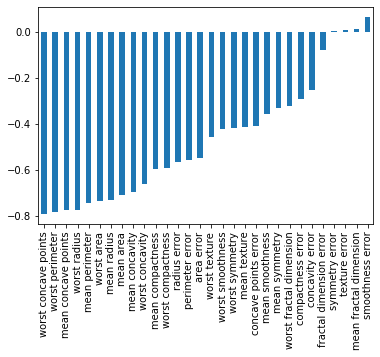

In [4]:
# See correlation of other variables to the output
df.corr()['benign_0__mal_1']
df.corr()['benign_0__mal_1'].sort_values()

# Notice the output itself is still included, so drop the last column ('benign_0__mal_1')
df.corr()['benign_0__mal_1'][:-1].sort_values()
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

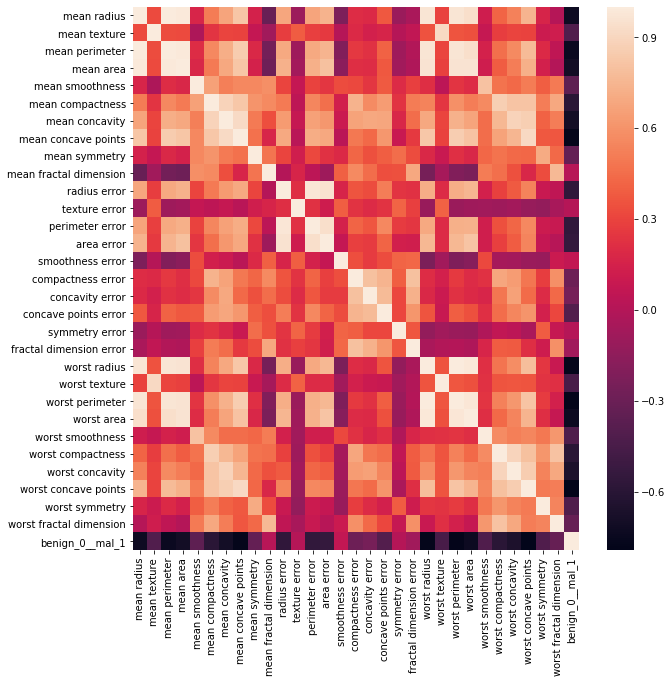

In [5]:
# Can see the correlation in a heatmap as well
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

In [6]:
# Build the data set to train
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

# create two numpy arrays from pd dataframes
from sklearn.model_selection import train_test_split
# train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101) # 25% will be test set, not too much data

# fit the scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# only fit to the training set
scaler.fit(X_train)
# overwrite the X_train and X_test with the scaled values
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# Model 1

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6678 - val_loss: 0.6403
Epoch 2/600
426/426 [==============================] - 0s 93us/sample - loss: 0.6184 - val_loss: 0.5926
Epoch 3/600
426/426 [==============================] - 0s 84us/sample - loss: 0.5702 - val_loss: 0.5445
Epoch 4/600
426/426 [==============================] - 0s 77us/sample - loss: 0.5229 - val_loss: 0.4951
Epoch 5/600
426/426 [==============================] - 0s 72us/sample - loss: 0.4750 - val_loss: 0.4468
Epoch 6/600
426/426 [==============================] - 0s 72us/sample - loss: 0.4339 - val_loss: 0.4022
Epoch 7/600
426/426 [==============================] - 0s 75us/sample - loss: 0.3874 - val_loss: 0.3616
Epoch 8/600
426/426 [==============================] - 0s 109us/sample - loss: 0.3492 - val_loss: 0.3219
Epoch 9/600
426/426 [==============================] - 0s 105us/sample - loss: 0.3147 - val_loss: 0.2868
Epoch 10/600
426/

426/426 [==============================] - 0s 89us/sample - loss: 0.0559 - val_loss: 0.1154
Epoch 79/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0524 - val_loss: 0.1150
Epoch 80/600
426/426 [==============================] - 0s 88us/sample - loss: 0.0498 - val_loss: 0.1033
Epoch 81/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0517 - val_loss: 0.1113
Epoch 82/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0492 - val_loss: 0.1082
Epoch 83/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0499 - val_loss: 0.1139
Epoch 84/600
426/426 [==============================] - 0s 41us/sample - loss: 0.0502 - val_loss: 0.1098
Epoch 85/600
426/426 [==============================] - 0s 76us/sample - loss: 0.0538 - val_loss: 0.1125
Epoch 86/600
426/426 [==============================] - 0s 76us/sample - loss: 0.0489 - val_loss: 0.1124
Epoch 87/600
426/426 [==============================] - 0s 77us/samp

426/426 [==============================] - 0s 91us/sample - loss: 0.0357 - val_loss: 0.1270
Epoch 156/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0359 - val_loss: 0.1373
Epoch 157/600
426/426 [==============================] - 0s 81us/sample - loss: 0.0369 - val_loss: 0.1189
Epoch 158/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0362 - val_loss: 0.1327
Epoch 159/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0348 - val_loss: 0.1261
Epoch 160/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0359 - val_loss: 0.1319
Epoch 161/600
426/426 [==============================] - 0s 127us/sample - loss: 0.0393 - val_loss: 0.1337
Epoch 162/600
426/426 [==============================] - 0s 75us/sample - loss: 0.0379 - val_loss: 0.1217
Epoch 163/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0407 - val_loss: 0.1375
Epoch 164/600
426/426 [==============================] - 0

426/426 [==============================] - 0s 87us/sample - loss: 0.0378 - val_loss: 0.1384
Epoch 233/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0274 - val_loss: 0.1404
Epoch 234/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0299 - val_loss: 0.1278
Epoch 235/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0360 - val_loss: 0.1627
Epoch 236/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0252 - val_loss: 0.1303
Epoch 237/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0290 - val_loss: 0.1523
Epoch 238/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0259 - val_loss: 0.1333
Epoch 239/600
426/426 [==============================] - 0s 79us/sample - loss: 0.0316 - val_loss: 0.1761
Epoch 240/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0268 - val_loss: 0.1352
Epoch 241/600
426/426 [==============================] - 0s 

Epoch 309/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0168 - val_loss: 0.1580
Epoch 310/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0199 - val_loss: 0.1940
Epoch 311/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0191 - val_loss: 0.1449
Epoch 312/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0194 - val_loss: 0.1777
Epoch 313/600
426/426 [==============================] - 0s 80us/sample - loss: 0.0171 - val_loss: 0.1447
Epoch 314/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0171 - val_loss: 0.1660
Epoch 315/600
426/426 [==============================] - 0s 82us/sample - loss: 0.0179 - val_loss: 0.1566
Epoch 316/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0173 - val_loss: 0.1573
Epoch 317/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0174 - val_loss: 0.1646
Epoch 318/600
426/426 [====================

Epoch 386/600
426/426 [==============================] - 0s 77us/sample - loss: 0.0115 - val_loss: 0.1742
Epoch 387/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0110 - val_loss: 0.1632
Epoch 388/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0106 - val_loss: 0.1739
Epoch 389/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0098 - val_loss: 0.1812
Epoch 390/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0107 - val_loss: 0.1842
Epoch 391/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0096 - val_loss: 0.1823
Epoch 392/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0098 - val_loss: 0.1663
Epoch 393/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0099 - val_loss: 0.1709
Epoch 394/600
426/426 [==============================] - 0s 83us/sample - loss: 0.0111 - val_loss: 0.1679
Epoch 395/600
426/426 [====================

426/426 [==============================] - 0s 79us/sample - loss: 0.0067 - val_loss: 0.2090
Epoch 464/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0061 - val_loss: 0.1899
Epoch 465/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0064 - val_loss: 0.2016
Epoch 466/600
426/426 [==============================] - 0s 72us/sample - loss: 0.0055 - val_loss: 0.1913
Epoch 467/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0059 - val_loss: 0.2137
Epoch 468/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0059 - val_loss: 0.1922
Epoch 469/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0058 - val_loss: 0.2075
Epoch 470/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0059 - val_loss: 0.2075
Epoch 471/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0057 - val_loss: 0.1992
Epoch 472/600
426/426 [==============================] - 0s

426/426 [==============================] - 0s 72us/sample - loss: 0.0042 - val_loss: 0.2618
Epoch 541/600
426/426 [==============================] - 0s 87us/sample - loss: 0.0037 - val_loss: 0.2480
Epoch 542/600
426/426 [==============================] - 0s 84us/sample - loss: 0.0037 - val_loss: 0.2222
Epoch 543/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0041 - val_loss: 0.2643
Epoch 544/600
426/426 [==============================] - ETA: 0s - loss: 5.6906e-0 - 0s 73us/sample - loss: 0.0035 - val_loss: 0.2250
Epoch 545/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0042 - val_loss: 0.2920
Epoch 546/600
426/426 [==============================] - 0s 73us/sample - loss: 0.0063 - val_loss: 0.2253
Epoch 547/600
426/426 [==============================] - 0s 85us/sample - loss: 0.0038 - val_loss: 0.2622
Epoch 548/600
426/426 [==============================] - 0s 78us/sample - loss: 0.0034 - val_loss: 0.2220
Epoch 549/600
426/426 [=========

Text(0.5, 1.0, 'Model 1')

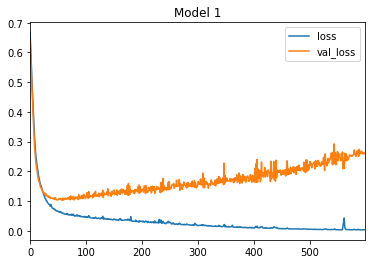

In [7]:
# Tensorflow Model 1 for Classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Create a simple model
# Can use this to check: # X_train.shape[1] is number of features, in this case = 30
X_train.shape # (426, 30) 

model = Sequential()
model.add(Dense(30, activation='relu')) # relu = rectified linear unit
model.add(Dense(15, activation='relu'))

# Binary classification model so last output must be binary
model.add(Dense(1, activation='sigmoid')) # output is 0 or 1

# Binary classification model
model.compile(loss='binary_crossentropy', optimizer='adam')

# Now we fit the model to 600 epochs to demonstrate the overfitting
# Also included the validation data
model.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test,y_test))

# plot out the loss
# we passed validation so we can pass both losses
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.title('Model 1')

# notice validation loss is increasing and we are overfitting to training set
# can we use early stopping - tensorflow keras call backs

# Model 2

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

426/426 [==============================] - 1s 2ms/sample - loss: 0.6894 - val_loss: 0.6722
Epoch 2/600
426/426 [==============================] - 0s 113us/sample - loss: 0.6640 - val_loss: 0.6483
Epoch 3/600
426/426 [==============================] - 0s 82us/sample - loss: 0.6382 - val_loss: 0.6213
Epoch 4/600
426/426 [==============================] - 0s 89us/sample - loss: 0.6079 - val_loss: 0.5886
Epoch 5/600
426/426 [==============================] - 0s 87us/sample - loss: 0.5685 - val_loss: 0.5418
Epoch 6/600
426/426 [==============================] - 0s 89us/sample - loss: 0.5188 - val_loss: 0.4882
Epoch 7/600
426/426 [==============================] - 0s 89us/sample - loss: 0.4644 - val_loss: 0.4303
Epoch 8/600
426/426 [==============================] - 0s 83us/sample - loss: 0.4099 - val_loss: 0.3753
Epoch 9/600
426/426 [==============================] - 0s 76us/sample - loss: 0.3595 - val_loss: 0.3234
Epoch 10/600
426/426 [==============================] - 0s 71us/sample - los

Text(0.5, 1.0, 'Model 2')

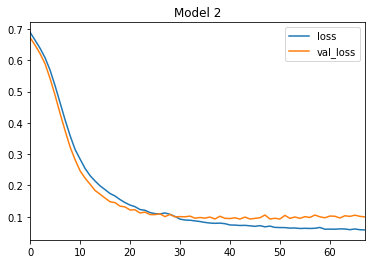

In [8]:
# create a NEW model with the callbacks

# Tensorflow Model for Classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Create a simple model
# Can use this to check: # X_train.shape[1] is number of features, in this case = 30
X_train.shape # (426, 30) 

model = Sequential()
model.add(Dense(30, activation='relu')) # relu = rectified linear unit
model.add(Dense(15, activation='relu'))

# Binary classification model so last output must be binary
model.add(Dense(1, activation='sigmoid')) # output is 0 or 1

# Binary classification model
model.compile(loss='binary_crossentropy', optimizer='adam')

from tensorflow.keras.callbacks import EarlyStopping
help(EarlyStopping)

# min = stop when quantity monitored has stopped decreasing (minimize validation loss)
# max = stop when quantity monitored has stopped increasing (maximize accuracy)
# patience = how many epochs to wait before stopping despite hitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Now we fit the model to 600 epochs to demonstrate the overfitting
# Also included the validation data
model.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop]
         )

# check the model loss again
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title('Model 2')

# flattening is OK
# glad to see the early stop did its job



# Model 3 - Best One - Classification Neural Network with Early Stopping Call Back and Neuron Dropout (Prevents Overfitting)

In [9]:
# THIRD MODEL
# Now we can create a third model (no callback, callback, callback with dropout)
from tensorflow.keras.layers import Dropout

# Tensorflow Model for Classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Can use this to check: # X_train.shape[1] is number of features, in this case = 30
X_train.shape # (426, 30) 

model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(30,))) # relu = rectified linear unit y = max(0, x)
model.add(Dropout(0.5)) 
# % Neurons Randomly Dropped Each time = means 0.5*30=15 neurons will not have weights or biases updated. 
# Ex) Dropout = 1 drops 100% of neurons, if dropout = 0 then drops 0% of neurons

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5)) 


# Binary classification model so last output must be binary
model.add(Dense(1, activation='sigmoid')) # output is 0 or 1

# Binary classification model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
# min = stop when quantity monitored has stopped decreasing (minimize validation loss)
# max = stop when quantity monitored has stopped increasing (maximize accuracy)
# patience = how many epochs to wait before stopping despite hitting
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

# Now we fit the model to 600 epochs to demonstrate the overfitting
# Also included the validation data
model.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop]
         )

# runs a little bit more than the Model 2 because of the randomly stopped updating neurons

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.7504 - val_loss: 0.6782
Epoch 2/600
426/426 [==============================] - 0s 77us/sample - loss: 0.7275 - val_loss: 0.6529
Epoch 3/600
426/426 [==============================] - 0s 84us/sample - loss: 0.6609 - val_loss: 0.6286
Epoch 4/600
426/426 [==============================] - 0s 89us/sample - loss: 0.6490 - val_loss: 0.6026
Epoch 5/600
426/426 [==============================] - 0s 91us/sample - loss: 0.6104 - val_loss: 0.5793
Epoch 6/600
426/426 [==============================] - 0s 91us/sample - loss: 0.6056 - val_loss: 0.5542
Epoch 7/600
426/426 [==============================] - 0s 92us/sample - loss: 0.5879 - val_loss: 0.5305
Epoch 8/600
426/426 [==============================] - 0s 91us/sample - loss: 0.5739 - val_loss: 0.5087
Epoch 9/600
426/426 [==============================] - 0s 88us/sample - loss: 0.5586 - val_loss: 0.4883
Epoch 10/600
426/42

426/426 [==============================] - 0s 113us/sample - loss: 0.0988 - val_loss: 0.1005
Epoch 79/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1345 - val_loss: 0.0961
Epoch 80/600
426/426 [==============================] - 0s 76us/sample - loss: 0.1088 - val_loss: 0.0993
Epoch 81/600
426/426 [==============================] - 0s 81us/sample - loss: 0.1152 - val_loss: 0.0933
Epoch 82/600
426/426 [==============================] - 0s 81us/sample - loss: 0.1162 - val_loss: 0.0996
Epoch 83/600
426/426 [==============================] - 0s 98us/sample - loss: 0.1215 - val_loss: 0.0933
Epoch 84/600
426/426 [==============================] - 0s 100us/sample - loss: 0.1221 - val_loss: 0.1017
Epoch 85/600
426/426 [==============================] - 0s 101us/sample - loss: 0.1143 - val_loss: 0.1049
Epoch 86/600
426/426 [==============================] - 0s 101us/sample - loss: 0.1377 - val_loss: 0.0903
Epoch 87/600
426/426 [==============================] - 0s 100us

426/426 [==============================] - 0s 105us/sample - loss: 0.0968 - val_loss: 0.0996
Epoch 156/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0778 - val_loss: 0.1134
Epoch 00156: early stopping


Text(0.5, 1.0, 'Model 3')

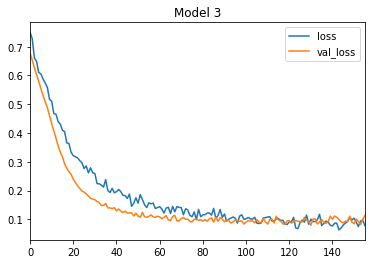

In [11]:
# check the model loss again
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()
plt.title('Model 3')

# flattening is OK
# glad to see the early stop did its job

In [12]:
# this model looks much better and less overfitting
# let us predict the classification output

predictions = model.predict_classes(X_test)

In [13]:
# performance for classification problems
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))
# https://en.wikipedia.org/wiki/Precision_and_recall

              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.99      0.95      0.97        88

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

[[54  1]
 [ 4 84]]
